In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [2]:
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringweek06.csv'
data = pd.read_csv(url)
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      7195 non-null   float64
 1   x2      7195 non-null   float64
 2   x3      7195 non-null   float64
 3   x4      7195 non-null   float64
 4   x5      7195 non-null   float64
 5   x6      7195 non-null   float64
 6   x7      7195 non-null   float64
 7   x8      7195 non-null   float64
 8   x9      7195 non-null   float64
 9   x10     7195 non-null   float64
 10  x11     7195 non-null   float64
 11  x12     7195 non-null   float64
 12  x13     7195 non-null   float64
 13  x14     7195 non-null   float64
 14  x15     7195 non-null   float64
 15  x16     7195 non-null   float64
 16  x17     7195 non-null   float64
 17  x18     7195 non-null   float64
 18  x19     7195 non-null   float64
 19  x20     7195 non-null   float64
 20  x21     7195 non-null   float64
 21  x22     7195 non-null   float64
dtype

In [5]:
# Preprocessing: Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [6]:
# Menghitung IQR (Interquartile Range) untuk setiap fitur
Q1 = np.percentile(data_scaled, 25, axis=0)  # Q1 adalah kuartil pertama
Q3 = np.percentile(data_scaled, 75, axis=0)  # Q3 adalah kuartil ketiga
IQR = Q3 - Q1  # Menghitung rentang interkuartil

# Tentukan batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menyaring data untuk menghapus outliers
filtered_data = data_scaled.copy()

# Menangani outliers: Menghapus data yang berada di luar batas bawah dan atas
for i in range(filtered_data.shape[1]):  # Iterasi untuk setiap kolom (fitur)
    filtered_data[:, i] = np.clip(filtered_data[:, i], lower_bound[i], upper_bound[i])

# Check if there are any extreme outliers remaining
pd.DataFrame(filtered_data).describe()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,7.195000e+03,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,1.465779e-01,0.000350,-0.015413,0.004021,0.017730,-0.007414,-0.018601,0.004143,0.000525,0.028214,...,0.000328,-0.005782,-0.001980,0.000151,0.000657,0.004055,-0.000958,-0.003988,-0.000077,0.000385
std,2.775750e-17,0.974325,0.960374,0.971965,0.942570,0.970522,0.946386,0.972202,0.997987,0.857701,...,0.998341,0.978727,0.993439,0.967830,0.996829,0.955846,0.972871,0.986148,0.987296,0.998782
min,1.465779e-01,-2.783462,-2.319287,-2.769195,-2.038216,-2.744280,-2.574891,-2.322246,-2.875395,-1.852352,...,-3.117846,-2.307761,-3.006839,-2.097480,-2.868521,-2.430084,-2.728450,-2.667354,-2.715574,-3.066142
25%,1.465779e-01,-0.721003,-0.655685,-0.681531,-0.462961,-0.708930,-0.725473,-0.539484,-0.690322,-0.449524,...,-0.743495,-0.614649,-0.821842,-0.513820,-0.655175,-0.588685,-0.685797,-0.719167,-0.691293,-0.705116
50%,1.465779e-01,-0.097879,-0.138890,0.221226,0.210893,-0.214777,-0.298922,0.117246,0.341370,0.058854,...,0.222251,-0.075218,-0.221269,-0.008181,0.174500,0.047977,-0.038187,-0.020559,-0.076001,0.144249
75%,1.465779e-01,0.653969,0.453383,0.710245,0.587210,0.647969,0.507472,0.649024,0.766394,0.485694,...,0.839406,0.514092,0.634823,0.541952,0.820390,0.638914,0.675971,0.579625,0.658227,0.868901
max,1.465779e-01,2.716428,2.116985,2.797909,2.162465,2.683319,2.356890,2.431786,2.951467,1.888521,...,3.213757,2.207204,2.819820,2.125611,3.033737,2.480313,2.718624,2.527812,2.682508,2.792111


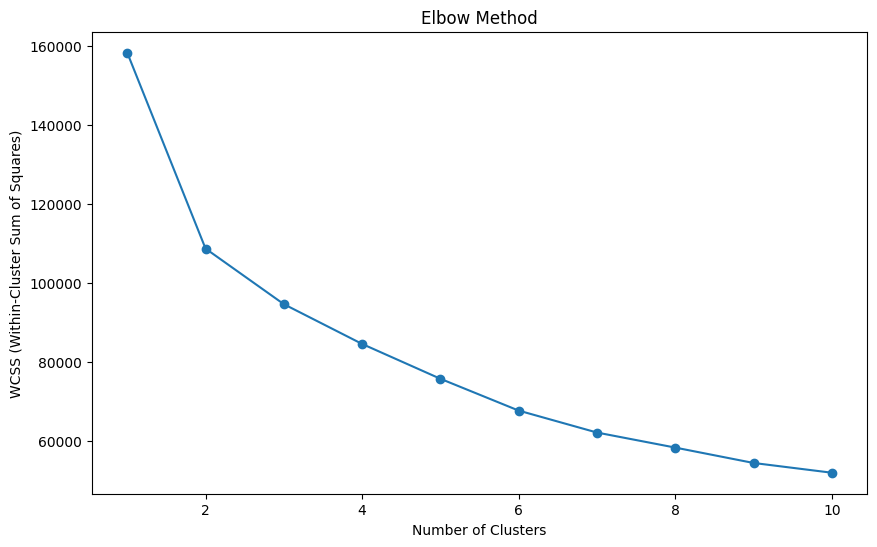

In [7]:
# Elbow Method to find the best number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Graph
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [8]:
# Apply KMeans clustering after handling outliers
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(filtered_data)

# Add the cluster labels to the filtered data
data['KMeans_Cluster'] = kmeans_labels

In [9]:
# Apply DBSCAN clustering after handling outliers
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(filtered_data)

# Add the cluster labels to the filtered data
data['DBSCAN_Cluster'] = dbscan_labels

In [10]:
# Evaluate KMeans and DBSCAN with the same metrics
silhouette_kmeans = silhouette_score(filtered_data, kmeans_labels)
calinski_kmeans = calinski_harabasz_score(filtered_data, kmeans_labels)
davies_kmeans = davies_bouldin_score(filtered_data, kmeans_labels)

silhouette_dbscan = silhouette_score(filtered_data, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
calinski_dbscan = calinski_harabasz_score(filtered_data, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
davies_dbscan = davies_bouldin_score(filtered_data, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

# Display evaluation metrics after handling outliers
print(f"KMeans Evaluation Metrics:\nSilhouette Score: {silhouette_kmeans}\nCalinski-Harabasz Score: {calinski_kmeans}\nDavies-Bouldin Score: {davies_kmeans}")
print(f"\nDBSCAN Evaluation Metrics:\nSilhouette Score: {silhouette_dbscan}\nCalinski-Harabasz Score: {calinski_dbscan}\nDavies-Bouldin Score: {davies_dbscan}")


KMeans Evaluation Metrics:
Silhouette Score: 0.35578996637926147
Calinski-Harabasz Score: 2675.9478410957067
Davies-Bouldin Score: 1.343666799452312

DBSCAN Evaluation Metrics:
Silhouette Score: -0.2173002448101071
Calinski-Harabasz Score: 17.153123386631943
Davies-Bouldin Score: 1.7146391666590435


In [11]:
# Import Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Applying Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)  # Tentukan jumlah klaster yang diinginkan (misal: 3)
agg_clust_labels = agg_clust.fit_predict(filtered_data)

# Add the Agglomerative Clustering labels to the original data
data['Agglomerative_Cluster'] = agg_clust_labels

In [12]:
# Evaluate Agglomerative Clustering
silhouette_agg = silhouette_score(filtered_data, agg_clust_labels)
calinski_agg = calinski_harabasz_score(filtered_data, agg_clust_labels)
davies_agg = davies_bouldin_score(filtered_data, agg_clust_labels)

# Display evaluation metrics
print(f"Agglomerative Clustering Evaluation Metrics:\nSilhouette Score: {silhouette_agg}\nCalinski-Harabasz Score: {calinski_agg}\nDavies-Bouldin Score: {davies_agg}")


Agglomerative Clustering Evaluation Metrics:
Silhouette Score: 0.3488104176338084
Calinski-Harabasz Score: 2573.151158182707
Davies-Bouldin Score: 1.2597329326077575


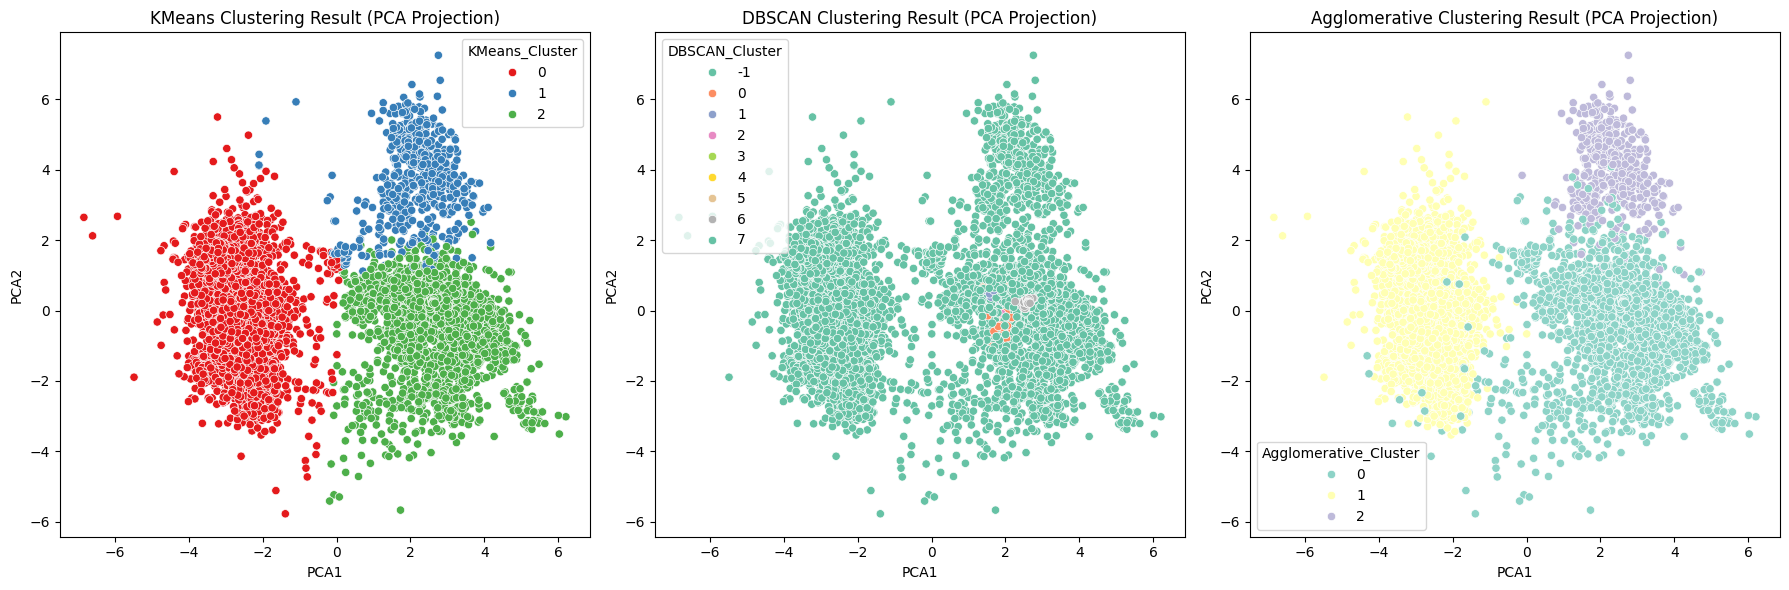

In [22]:
# Reducing to 2 dimensions using PCA
pca = PCA(n_components=2)
filtered_pca = pca.fit_transform(filtered_data)

# Add PCA components to the data
data['PCA1'] = filtered_pca[:, 0]
data['PCA2'] = filtered_pca[:, 1]

# Plotting the Clustering Results

plt.figure(figsize=(18, 6))

# Plotting KMeans Clusters
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='KMeans_Cluster',  # KMeans clustering labels
    palette='Set1',  # Color palette
    data=data,
    legend='full'
)
plt.title('KMeans Clustering Result (PCA Projection)')

# Plotting DBSCAN Clusters
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='DBSCAN_Cluster',  # DBSCAN clustering labels
    palette='Set2',  # Color palette
    data=data,
    legend='full'
)
plt.title('DBSCAN Clustering Result (PCA Projection)')

# Plotting Agglomerative Clusters
plt.subplot(1, 3, 3)
sns.scatterplot(
    x='PCA1', y='PCA2',
    hue='Agglomerative_Cluster',  # Agglomerative clustering labels
    palette='Set3',  # Color palette
    data=data,
    legend='full'
)
plt.title('Agglomerative Clustering Result (PCA Projection)')

# Layout adjustment for better spacing
plt.tight_layout()
plt.show()


## Silhouette Coefficient
Silhouette score mengukur seberapa mirip suatu titik dengan cluster-nya sendiri dibandingkan dengan cluster lain.

\[
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
\]

- \( a(i) \): rata-rata jarak titik \(i\) ke semua titik lain dalam cluster yang sama.
- \( b(i) \): jarak rata-rata terkecil titik \(i\) ke semua titik di cluster lain.

Nilai mendekati 1 berarti cluster bagus, mendekati -1 berarti buruk.

## Calinski-Harabasz Index
Mengukur rasio antara dispersi antar-cluster terhadap dispersi intra-cluster.

\[
CH = \frac{Tr(B_k) / (k-1)}{Tr(W_k) / (n-k)}
\]

- \( Tr(B_k) \): trace dari matriks dispersi antar-cluster.
- \( Tr(W_k) \): trace dari matriks dispersi dalam-cluster.
- \( n \): jumlah total data.
- \( k \): jumlah cluster.

Semakin besar nilainya, semakin baik pemisahan cluster.

## Davies-Bouldin Index
Mengukur rata-rata "kemiripan" antar semua cluster. Semakin kecil, semakin bagus.

\[
DB = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} R_{ij}
\]

\[
R_{ij} = \frac{s_i + s_j}{d_{ij}}
\]

- \( s_i \): jarak rata-rata antara titik dalam cluster \(i\) ke centroid-nya.
- \( d_{ij} \): jarak antara centroid cluster \(i\) dan \(j\).